In [ ]:

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 125ms/step - accuracy: 0.7345 - loss: 0.8001 - val_accuracy: 0.9752 - val_loss: 0.0873
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 125ms/step - accuracy: 0.9572 - loss: 0.1449 - val_accuracy: 0.9831 - val_loss: 0.0556
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 121ms/step - accuracy: 0.9702 - loss: 0.0987 - val_accuracy: 0.9852 - val_loss: 0.0477
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 119ms/step - accuracy: 0.9765 - loss: 0.0795 - val_accuracy: 0.9883 - val_loss: 0.0434
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 124ms/step - accuracy: 0.9783 - loss: 0.0719 - val_accuracy: 0.9897 - val_loss: 0.0374
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 123ms/step - accuracy: 0.9802 - loss: 0.0669 - val_accuracy: 0.9889 - val_loss: 0.0369
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 118ms/step - accuracy: 0.9826 - loss: 0.0574 - val_accuracy: 0.9895 - val_loss: 0.0364
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 123ms/step - accuracy: 0.9835 - loss: 0

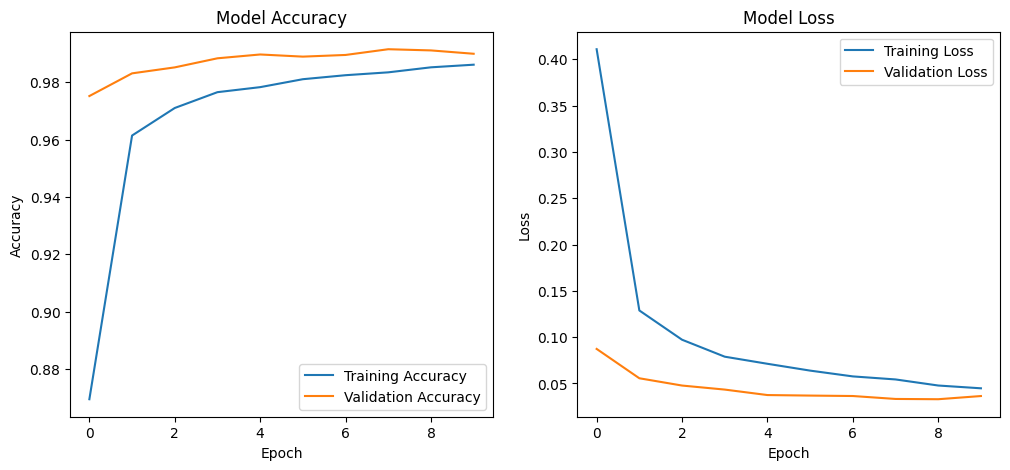

In [ ]:

# Preprocess the data: Reshape and normalize
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_accuracy:.4f}')

# Plot the accuracy and loss curves
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

# Call the function to plot the history
plot_history(history)s